In [63]:
## Observations and Insights
# There is a statistically significant difference in the effectives between the drug types in minimizing the
# growth of tumors in the mice studied.  Capomulin and Ramicane have much more encouraging results than
# Infubinol or Ceftamin.  We also see a reasonably strong positive correlation between the weight of the
# mice and the size of the tumor volumes in the Capumulin test data.  We are not sure this is significant
# measure of the effectiveness of the Capumulin formulary.
# As with any labroatroy test we would like to see a borader set of samples over a longer period ot time to
# get better accuracy and see if there are any long term effects of the treatments seen in this study.

In [12]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [13]:
# Combine the data into a single dataset
merged_data_df = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='right')

# Display the data table for preview
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
# Check the number of mice
len(merged_data_df['Mouse ID'].unique())

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateRows_df = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
unique = duplicateRows_df['Mouse ID'].unique()
unique

array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID.
DupMouse = duplicateRows_df.iloc[0,0]
mousedups_df = merged_data_df.loc[merged_data_df['Mouse ID']==DupMouse, :]
mousedups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df = merged_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [18]:
# Check formerly duplicated Mosue ID after cleaning
mousenodups_df = mouse_data_df.loc[mouse_data_df['Mouse ID']==DupMouse, :]
mousenodups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


In [19]:
# SDL - The Starter book at this point shows 248 but since all we did was remove duplicate rows
#  why would the number of unique Mouse IDs change?
len(mouse_data_df['Mouse ID'].unique())

249

In [20]:
grouped_regimen_df = mouse_data_df.groupby(['Drug Regimen'])
# grouped_regimen_df.sort_values(by=['Drug Regimen'])
grouped_regimen_df.count().head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [21]:
meantumor = grouped_regimen_df["Tumor Volume (mm3)"].mean()
meantumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
#  of the tumor volume for each regimen.
meantumor = grouped_regimen_df["Tumor Volume (mm3)"].mean()
mediantumor  = grouped_regimen_df["Tumor Volume (mm3)"].median()
tumorvariance = grouped_regimen_df["Tumor Volume (mm3)"].var()
tumorstddev = grouped_regimen_df["Tumor Volume (mm3)"].std()
tumorstderr = grouped_regimen_df["Tumor Volume (mm3)"].sem()

In [28]:
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume":meantumor,
                               "Median Tumor Volume":mediantumor,
                               "Tumor Volume Variance":tumorvariance,
                               "Tumor Volume Std. Dev.":tumorstddev,
                               "Tumor Volume Std. Err.":tumorstderr})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use method to produce everything with a single groupby function
stats_regimen_df = mouse_data_df.groupby(['Drug Regimen'], as_index=False).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stats_regimen_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'right')])])

In [30]:
# Count the number of mouse for each Drug
# count_mice = grouped_regimen_df['Mouse ID'].count() - First Attempt, wrong construct
mouse_by_drug = mouse_data_df['Drug Regimen'].value_counts()
mouse_by_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

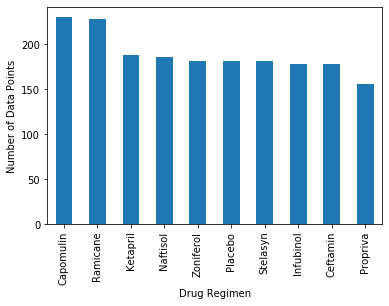

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
regimen_chart = mouse_by_drug.plot(kind='bar')
# Set the xlabel and ylabel using class methods
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Data Points")
plt.show()
# plt.tight_layout()

In [32]:
mouse_by_drug_df = pd.DataFrame(mouse_by_drug)
mouse_by_drug_df.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

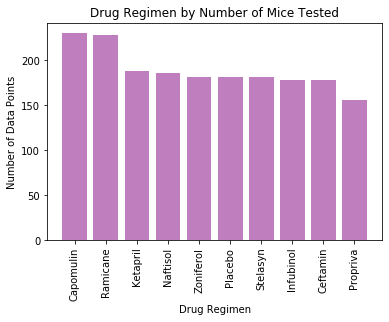

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mouse_by_drug.index, mouse_by_drug.values, color='purple', alpha=0.5, align="center")
plt.xticks(rotation = 90)
# Set a Title and labels
plt.title("Drug Regimen by Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [34]:
mouse_by_gender = mouse_data_df['Sex'].value_counts()
mouse_by_gender

Male      958
Female    930
Name: Sex, dtype: int64

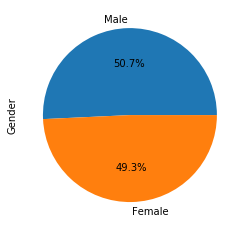

In [35]:
gender_chart = mouse_by_gender.plot(kind='pie',autopct="%1.1f%%")
gender_chart.set_ylabel("Gender")
plt.show()

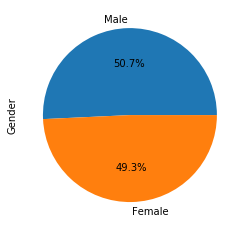

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
plt.pie(mouse_by_gender.values,labels = mouse_by_gender.index,autopct="%1.1f%%")
plt.ylabel("Gender")
plt.show()

In [37]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
mouse_by_ID = mouse_data_df.groupby(['Mouse ID'], as_index=False)
last_TP = mouse_by_ID["Timepoint"].max()
last_TP

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [40]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_TP_merged = pd.merge(last_TP,mouse_data_df,on=['Mouse ID','Timepoint'],how='inner')
last_TP_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [45]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [46]:
# Create an empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []
stats = []

In [47]:
# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers.
for drug in treatment_list:
    result = last_TP_merged[last_TP_merged['Drug Regimen'] == drug]
    tumor_vol = result['Tumor Volume (mm3)']
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = result.loc[(result['Tumor Volume (mm3)'] > upper_bound) |
                          (result['Tumor Volume (mm3)'] < lower_bound), 'Tumor Volume (mm3)']
    
    tumor_vol_list.append(tumor_vol)
    print(drug + "'s potential outliers:",outliers)
    stats.append([drug,iqr,lower_bound,upper_bound])

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [48]:
outliers_df = pd.DataFrame(tumor_vol_list,columns=['Drug','IQR','Lower Bound','Upper Bound'])
outliers_df

,Drug,IQR,Lower Bound,Upper Bound
Tumor Volume (mm3),NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN
Tumor Volume (mm3),NaN,NaN,NaN,NaN


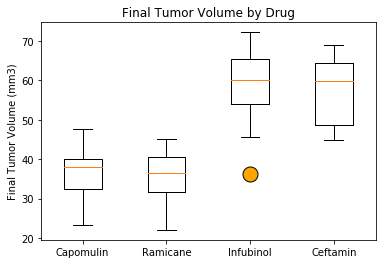

In [49]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list,labels = treatment_list,
            flierprops=dict(markerfacecolor="orange",markersize = 15))
plt.show()

In [50]:
drug  = 'Capomulin'
result = last_TP_merged[last_TP_merged['Drug Regimen']==drug]

Enter Mouse ID to plot: b128


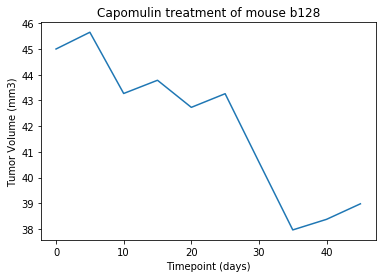

In [51]:
# Get Mouse ID and build data
MID = input("Enter Mouse ID to plot: ")
mouse_data_mid = mouse_data_df.set_index("Mouse ID")
one_mouse = mouse_data_mid.loc[[MID],["Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(one_mouse['Timepoint'], one_mouse['Tumor Volume (mm3)'])
#plt.xticks(rotation = 90)
# Set a Title and labels
plt.title("Capomulin treatment of mouse " + MID)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Get Drug and build data
one_drug = mouse_data_df.loc[mouse_data_df['Drug Regimen'] == 'Capomulin']
one_drug.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


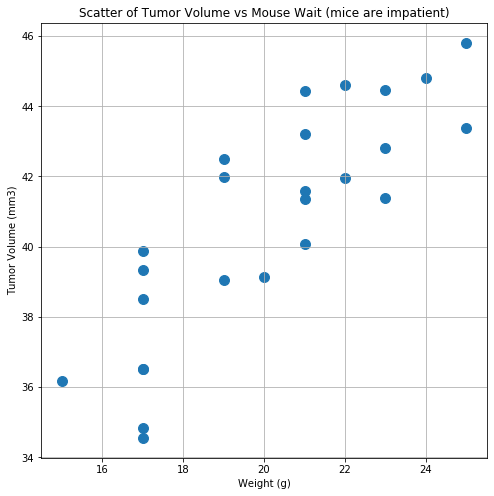

In [61]:
one_drug_avg = one_drug.groupby(['Mouse ID']).mean()
one_drug_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",s = 99, grid=True, 
              figsize=(8,8), title = "Scatter of Tumor Volume vs Mouse Wait (mice are impatient)")
plt.show()

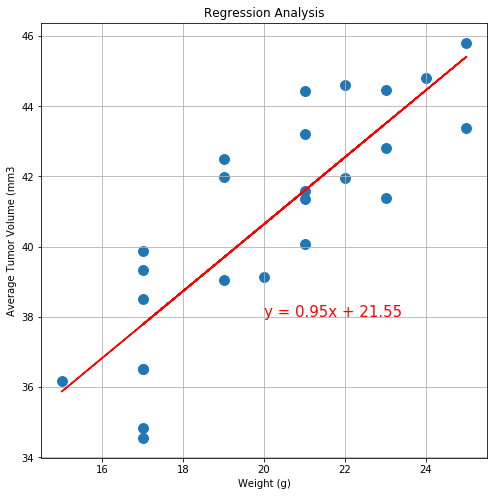

In [59]:
# Add the linear regression equation and line to plot
x_values = one_drug_avg['Weight (g)']
y_values = one_drug_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
one_drug_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",s = 98, grid=True, 
              figsize=(8,8), title = "Regression Analysis")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.rcParams['figure.figsize']=(8,8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3')
plt.show()